Load Data

In [1]:
import pandas as pd 
import os 

PATH = 'coding_round_data.csv'
df_eco = pd.read_csv(PATH)

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)

In [3]:
df_eco.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df_eco.shape

(12330, 18)

In [5]:
df_eco.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df_eco.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df_eco.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df_eco.loc[df_eco.duplicated(keep=False)].head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False


In [10]:
df_eco_dropdp = df_eco.drop_duplicates()

In [11]:
len(df_eco_dropdp.loc[df_eco_dropdp.duplicated(keep=False)])

0

Data EDA 

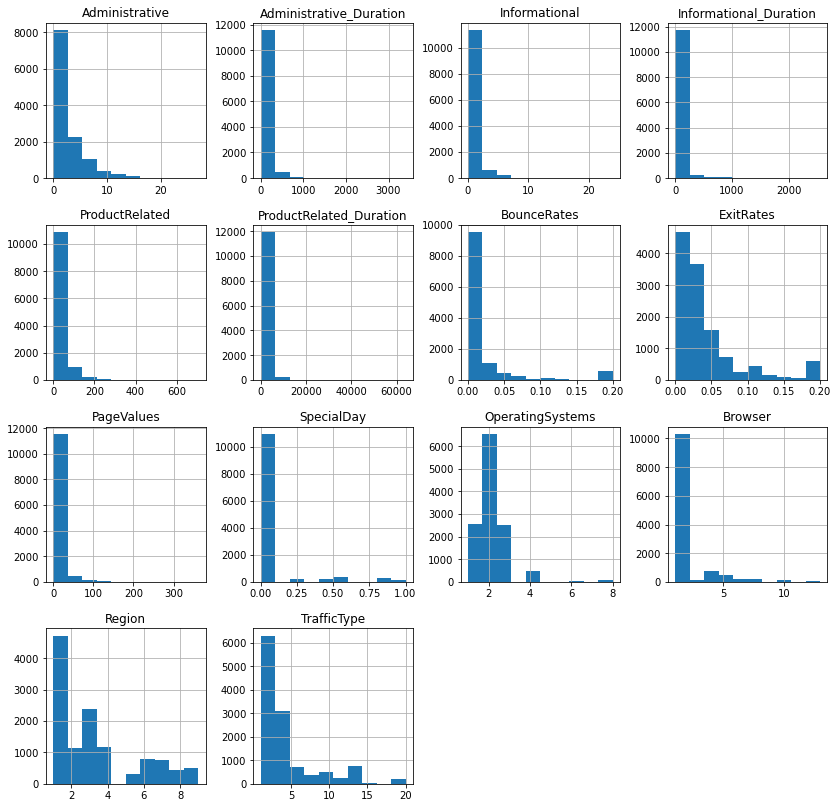

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_eco_num = df_eco_dropdp.select_dtypes(include = ['float64', 'int64']).copy()
df_eco_num.hist(figsize = (14,14))
plt.show()

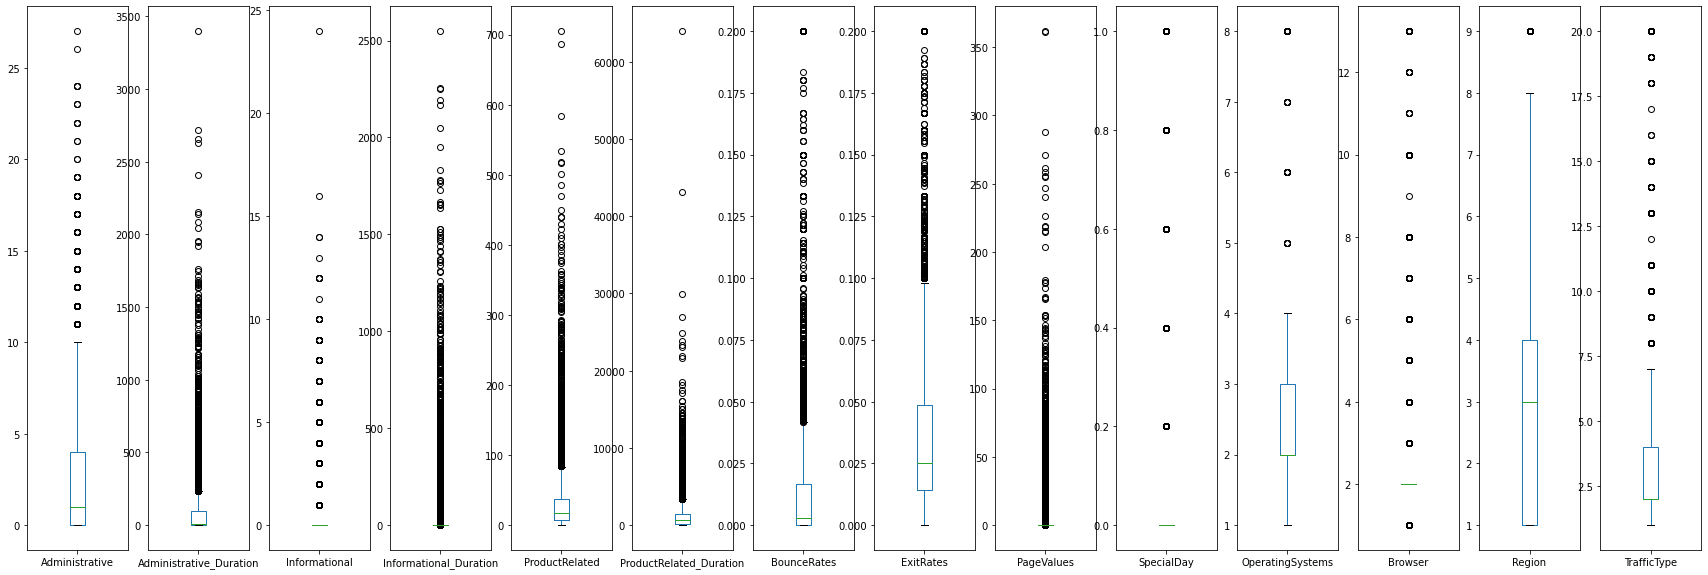

In [13]:
num_feature_size = df_eco_num.shape[1]
fig, axs = plt.subplots(1,num_feature_size,figsize=(30,10))

for idx in range(1, num_feature_size+1):
    plt.subplot(1,num_feature_size,idx)
    df_eco_num.iloc[:, idx-1].plot(kind = 'box')

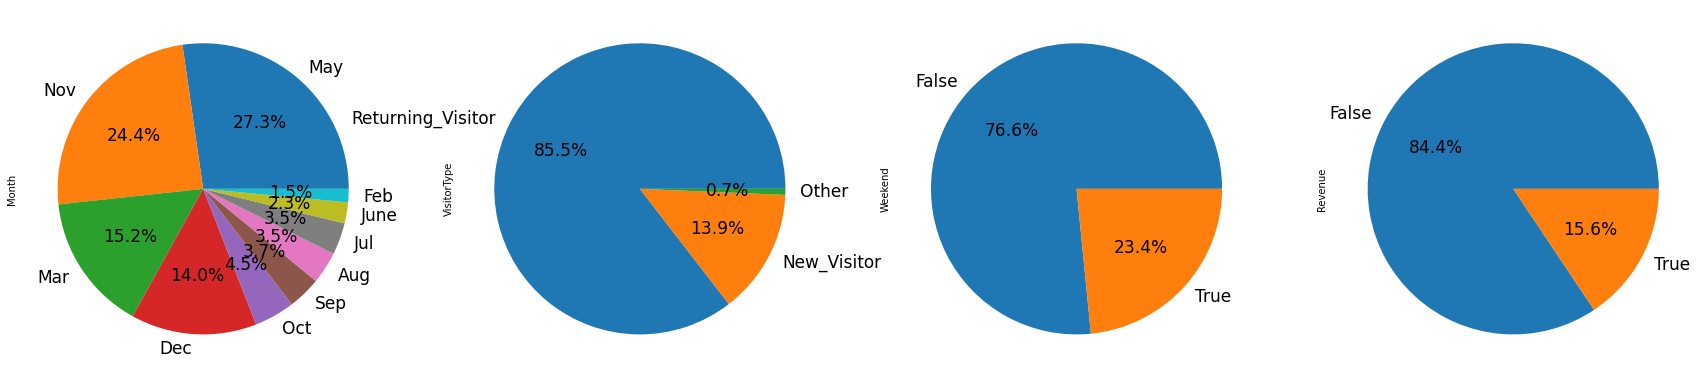

In [14]:
df_eco_cat = df_eco_dropdp.select_dtypes(include = ['object', 'bool']).copy()
cat_feature_size = df_eco_cat.shape[1]
fig,axs = plt.subplots(1, cat_feature_size, figsize = (30,10))

for idx in range(1, cat_feature_size+1):
    plt.subplot(1, cat_feature_size, idx)
    df_eco_cat.iloc[:, idx-1].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", fontsize = 17)

<AxesSubplot:>

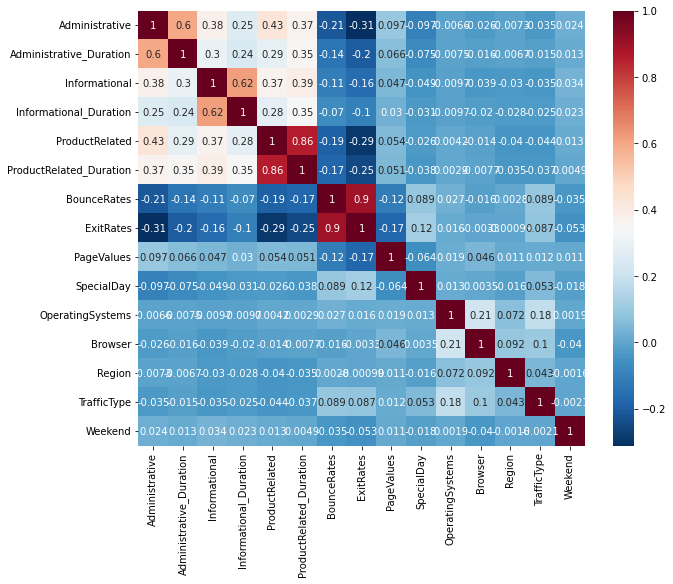

In [17]:
corr_matrix = df_eco_dropdp.loc[:, df_eco_dropdp.columns!= 'Revenue'].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, cmap = 'RdBu_r', annot= True)

In [20]:
df_eco_dropdp.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

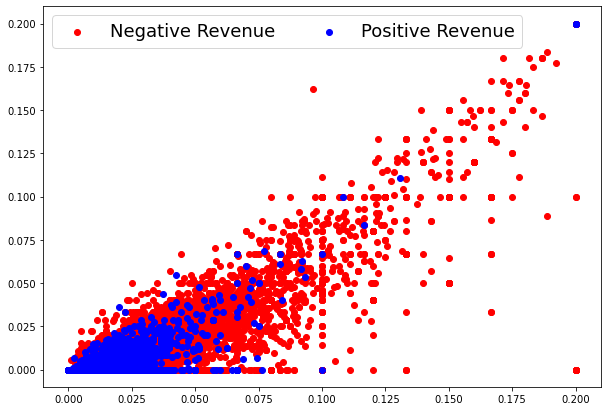

In [43]:
plt.figure(figsize = (10,7))

scatter2 = plt.scatter(x='ExitRates',y='BounceRates', data =df_eco_dropdp[df_eco_dropdp['Revenue']==False], c = 'red')        
scatter1 = plt.scatter(x='ExitRates',y='BounceRates', data =df_eco_dropdp[df_eco_dropdp['Revenue']==True], c= 'blue')
plt.legend((scatter2, scatter1),
           ('Negative Revenue', 'Positive Revenue',),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=18)
plt.show()

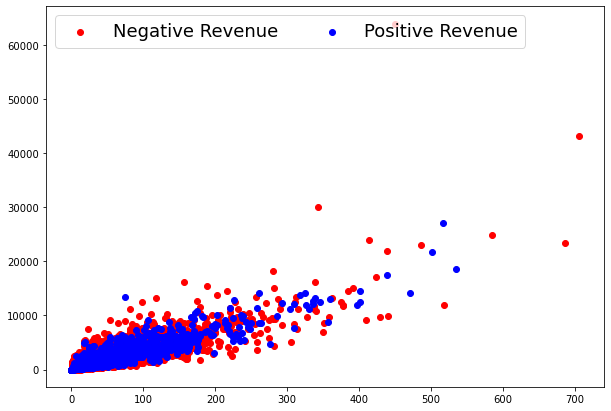

In [40]:
plt.figure(figsize = (10,7))

scatter2 = plt.scatter(x='ProductRelated',y='ProductRelated_Duration', data =df_eco_dropdp[df_eco_dropdp['Revenue']==False], c = 'red')        
scatter1 = plt.scatter(x='ProductRelated',y='ProductRelated_Duration', data =df_eco_dropdp[df_eco_dropdp['Revenue']==True], c= 'blue')
plt.legend((scatter2, scatter1),
           ('Negative Revenue', 'Positive Revenue',),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=18)
plt.show()